In [4]:
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from pyclustering.cluster.kmedoids import kmedoids
import numpy.linalg as la
import pylab
import scipy.cluster.hierarchy as shc
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import os
os.chdir("C:/Users/WZY77/Downloads")

In [6]:
data = np.load("./mds-population.npz")

data['D'].shape


(42, 42)

(a)

In [43]:
mds_data = MDS(n_components=2,dissimilarity='precomputed')
datanew = mds_data.fit_transform(data['D'])
datanew.shape

(42, 2)

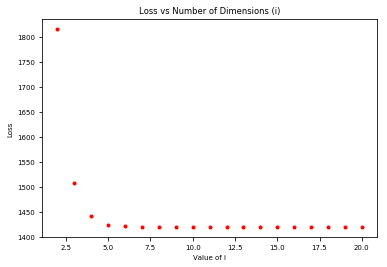

In [44]:
loss = []
for i in range (2, 21):
    mdsd = MDS(n_components=i,dissimilarity='precomputed')
    xnew = mdsd.fit_transform(data['D'])
    xeuc = euclidean_distances(xnew,xnew)
    xla = la.norm(data['D']-xeuc)
    loss.append(xla)
    
fig, ax = plt.subplots()

plt.xlabel('Value of i')
plt.ylabel('Loss') 
plt.title('Loss vs Number of Dimensions (i)')
plt.plot(range(2,21),loss,'r.')
plt.show()

i. MDS is used for showing the dissimilarity in data by representing them as distances between points in a low dimensional space. It assumes that euclidean distance between pairs of points approximates the Nei’s distance between populations. And it also assumes that each point of data is equally important. However, if the multidimensional data does not translate well into smaller dimensions, this method may fail. In order to determine the amount of information that is loss, we can use stress.

ii. According to the Loss-Number of i plot above, 5 dimensions seems to be enough to capture most of variation of data.

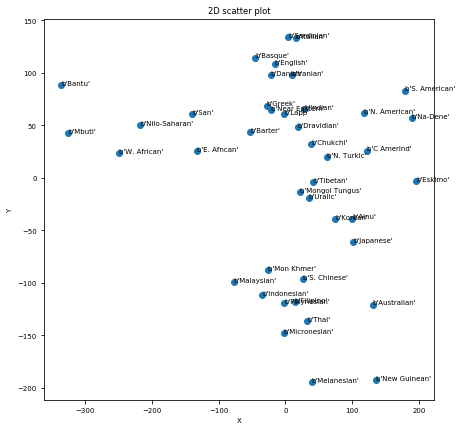

In [46]:
x = []
y = []
for t in datanew:
    x.append(t[0])
    y.append(t[1])

plt.rcParams.update({'font.size': 7})
plt.scatter(x, y)
for i, text in enumerate(data['population_list']):
    plt.annotate(text, (x[i], y[i]))
plt.xlabel('X')
plt.ylabel('Y') 
plt.title('2D scatter plot')
plt.gcf().set_size_inches((7, 7)) 
plt.show()

iii. Scatterplot shows above.

(b)

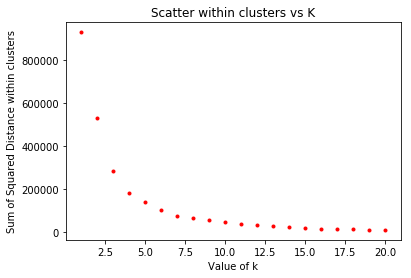

In [47]:
plt.rcParams.update({'font.size': 10})
def kmeans_test(data,k): 
    ssd = []
    for k in range(1,k+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        ssd.append(kmeans.inertia_) 
    plt.plot(range(1,k+1), ssd, 'r.')
    plt.xlabel('Value of k')
    plt.ylabel('Sum of Squared Distance within clusters')
    plt.title('Scatter within clusters vs K')
    plt.show()
    
kmeans_test(datanew,20)

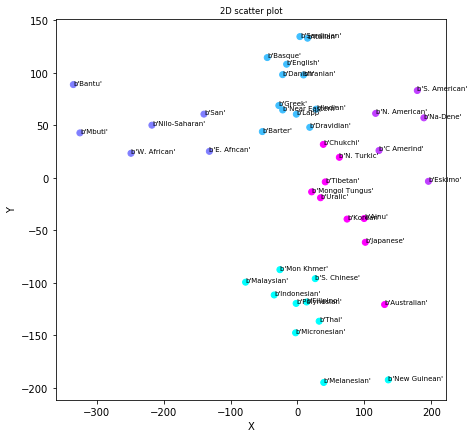

In [48]:
km = KMeans(n_clusters=5, random_state=0).fit(datanew)
plt.scatter(x,y, c=km.labels_, cmap=pylab.cm.cool)
plt.rcParams.update({'font.size': 7})
for i, text in enumerate(data['population_list']):
    plt.annotate(text, (x[i], y[i]))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D scatter plot')
plt.gcf().set_size_inches((7, 7)) 
plt.show()

This result seems to be acceptable since it shows some reasonable clusters.
But the features, which are distances in this case, inside each cluster have been lost during K-means.


(c)

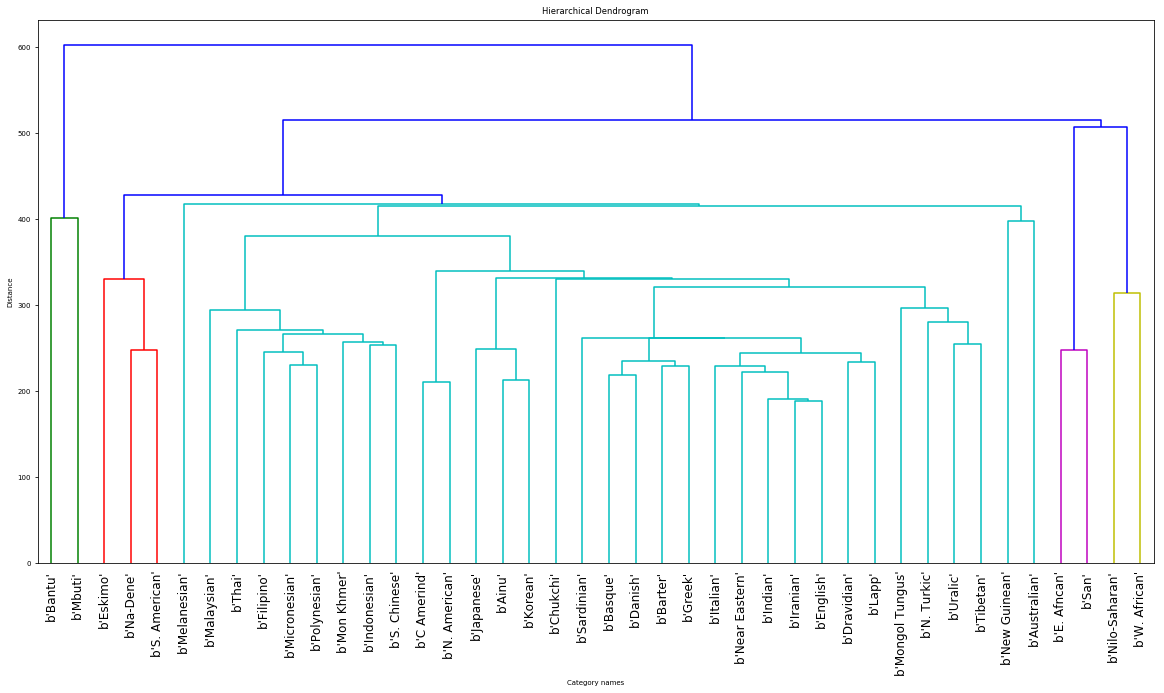

In [49]:
dist = linkage(data['D'], 'single')
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Dendrogram')
plt.xlabel('Category names')
plt.ylabel('Distance')
pop = data['population_list']

dendrogram(dist,leaf_rotation=90., leaf_font_size=12.,leaf_label_func=lambda v: str(pop[v]))
plt.show()

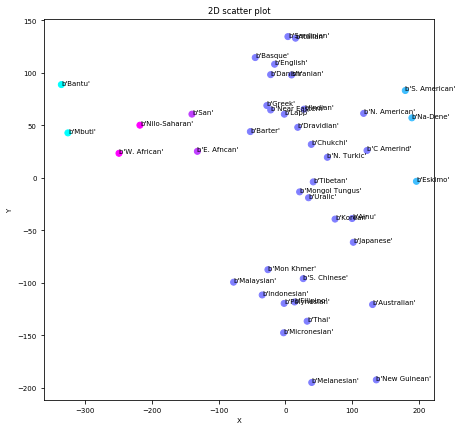

In [50]:
cutoff = 420
clust = fcluster(dist, cutoff, criterion='distance')
plt.scatter(x,y, c=clust, cmap=pylab.cm.cool)
plt.rcParams.update({'font.size': 7})
for i, text in enumerate(data['population_list']):
    plt.annotate(text, (x[i], y[i]))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D scatter plot')
plt.gcf().set_size_inches((7, 7)) 
plt.show()

We choose a cut-off that would make the same number of clusters as k-means, but the result of hierarchical clustering is not really acceptable since it makes a large cluster with 4 little clusters, which do not make intuitive sense.


(d)

In [54]:
initial_medoids = [1,10,15,25,30]
kmd = kmedoids(data['D'], initial_medoids, data_type='distance_matrix')
kmd.process()
clusters = kmd.get_clusters()
medoids = kmd.get_medoids()
print(clusters)


[[2, 0, 1, 3, 4, 6], [17, 10, 11, 12, 13, 16, 18, 31, 32, 33, 34, 35, 40, 41], [23, 14, 15, 19, 20, 21, 37, 38, 39], [22, 36], [29, 5, 7, 8, 9, 24, 25, 26, 27, 28, 30]]


In [55]:
df = pd.DataFrame(list(range(42))) 
df['Clusters'] = np.NaN

for i in range(len(clusters)):
    for j in range(0,42):
            if [k in clusters[i] for k in df[0]][j]:
                df.iloc[j,1] = i+1

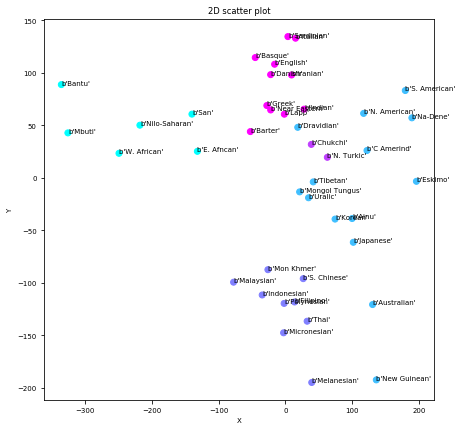

In [56]:
clst=list(df['Clusters'])
plt.scatter(x,y, c=clst, cmap=pylab.cm.cool)
plt.rcParams.update({'font.size': 7})
for i, text in enumerate(data['population_list']):
    plt.annotate(text, (x[i], y[i]))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D scatter plot')
plt.gcf().set_size_inches((7, 7)) 
plt.show()

As the plot showing above, k-medoids also gives us a reasonable result, but one of the clusters are still too little to be convincing. Comparing with k-means, we would say k-means still has a better result than k-medoids.